# edX - massive open online course (MOOC) provider

It hosts online university-level courses in a wide range of disciplines to a worldwide student body. It also conducts research into learning based on how people use its platform. EdX differs from other MOOC providers, such as Coursera and Udacity, in that it is a nonprofit organization and runs on the Open edX open-source software.
The Massachusetts Institute of Technology and Harvard University created edX in May 2012. More than 70 schools, nonprofit organizations, and corporations offer or plan to offer courses on the edX website. As of 29 December 2016, edX has around 10 million students taking more than 1,270 courses online. Wikipedia

In [1]:
import pandas as pd 
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt


from sklearn import preprocessing
import numpy as np
import matplotlib  
matplotlib.style.use('ggplot')
import math
#conda install -c conda-forge wordcloud=1.2.1
#import matplotlib.pyplot as plt

# Data from kaggle

In [2]:
df = pd.read_excel("EDXup1.xlsx")  
df['year'] = df['Launch Date'].dt.year
print(df.columns)

Index(['Institution', 'Course Number', 'Launch Date', 'Course Title',
       'Instructors', 'Course Subject', 'Year', 'Honor Code Certificates',
       'Participants (Course Content Accessed)',
       'Audited (> 50% Course Content Accessed)', 'Certified', '% Audited',
       '% Certified', '% Certified of > 50% Course Content Accessed',
       '% Played Video', '% Posted in Forum', '% Grade Higher Than Zero',
       'Total Course Hours (Thousands)', 'Median Hours for Certification',
       'Median Age', '% Male', '% Female', '% Bachelor's Degree or Higher',
       'year'],
      dtype='object')


In [3]:
len(df)  #Shows the length, that is number of records

290

In [4]:
df.head()  # Shows the first records

,Institution,Course Number,Launch Date,Course Title,Instructors,Course Subject,Year,Honor Code Certificates,Participants (Course Content Accessed),Audited (> 50% Course Content Accessed),...,% Played Video,% Posted in Forum,% Grade Higher Than Zero,Total Course Hours (Thousands),Median Hours for Certification,Median Age,% Male,% Female,% Bachelor's Degree or Higher,year
0,MITx,6.002x,2012-05-09,Circuits and Electronics,Khurram Afridi,"Science, Technology, Engineering, and Mathematics",1,1,36105,5431,...,83.2,8.17,28.97,418.94,64.45,26.0,88.28,11.72,60.68,2012
1,MITx,6.00x,2012-09-26,Introduction to Computer Science and Programming,"Eric Grimson, John Guttag, Chris Terman",Computer Science,1,1,62709,8949,...,89.14,14.38,39.50,884.04,78.53,28.0,83.5,16.50,63.04,2012
2,MITx,3.091x,2012-09-10,Introduction to Solid State Chemistry,Michael Cima,"Science, Technology, Engineering, and Mathematics",1,1,16663,2855,...,87.49,14.42,34.89,227.55,61.28,27.0,,29.68,58.76,2012
3,HarvardX,CS50x,2012-10-15,Introduction to Computer Science,"David Malan, Nate Hardison, Rob Bowden, Tommy ...",Computer Science,1,1,129400,12888,...,0,0.00,1.11,220.90,0.00,28.0,80.02,19.98,58.78,2012
4,HarvardX,PH207x,2012-10-15,Health in Numbers: Quantitative Methods in Cli...,"Earl Francis Cook, Marcello Pagano","Government, Health, and Social Science",1,1,52521,10729,...,77.45,15.98,32.52,804.41,76.10,32.0,56.78,43.22,88.33,2012


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 290 entries, 0 to 289
Data columns (total 24 columns):
Institution                                     290 non-null object
Course Number                                   290 non-null object
Launch Date                                     290 non-null datetime64[ns]
Course Title                                    290 non-null object
Instructors                                     289 non-null object
Course Subject                                  290 non-null object
Year                                            290 non-null int64
Honor Code Certificates                         290 non-null int64
Participants (Course Content Accessed)          290 non-null int64
Audited (> 50% Course Content Accessed)         290 non-null int64
Certified                                       290 non-null int64
% Audited                                       290 non-null float64
% Certified                                     290 non-null float64
% Cert

In [6]:
df.describe()  # Same as Summary command in R

,Year,Honor Code Certificates,Participants (Course Content Accessed),Audited (> 50% Course Content Accessed),Certified,% Audited,% Certified,% Certified of > 50% Course Content Accessed,% Posted in Forum,% Grade Higher Than Zero,Total Course Hours (Thousands),Median Hours for Certification,Median Age,% Female,% Bachelor's Degree or Higher,year
count,290.000000,290.000000,290.000000,290.000000,290.000000,290.000000,290.000000,290.000000,290.000000,290.000000,290.000000,290.000000,290.000000,290.000000,290.000000,290.000000
mean,3.172414,0.813793,15344.334483,2549.172414,843.810345,24.916966,7.782586,31.445655,9.347517,21.210379,94.981828,44.364552,29.300000,32.989310,72.078724,2014.768966
std,0.906301,0.389946,28207.578733,3095.159969,1105.594372,15.883538,6.972437,19.751102,7.517141,13.411540,157.617610,43.953709,4.047897,15.843642,10.256434,0.972851
min,1.000000,0.000000,322.000000,187.000000,0.000000,2.630000,0.000000,0.000000,0.000000,0.000000,0.110000,0.000000,22.000000,6.560000,44.950000,2012.000000
25%,3.000000,1.000000,3815.000000,755.250000,139.500000,14.215000,2.407500,13.400000,3.992500,10.590000,12.960000,12.242500,26.000000,18.367500,64.515000,2014.000000
50%,3.000000,1.000000,7901.500000,1517.000000,395.500000,20.425000,5.950000,31.270000,7.245000,19.605000,37.710000,26.965000,29.000000,33.485000,73.055000,2015.000000
75%,4.000000,1.000000,18038.250000,3383.000000,1201.750000,33.837500,10.687500,47.622500,14.107500,30.902500,97.225000,64.177500,31.000000,45.830000,79.245000,2015.000000
max,4.000000,1.000000,301082.000000,25637.000000,5783.000000,83.960000,33.980000,77.090000,35.280000,52.350000,895.010000,251.820000,53.000000,74.760000,98.110000,2016.000000


# 1.Number of courses by Institution

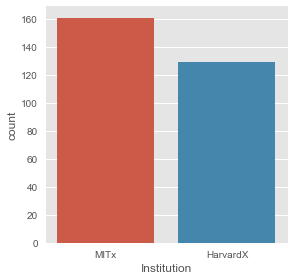

In [7]:
sns.factorplot('Institution',data=df,kind='count')

# 2. Number of courses by Institution - year based distribution

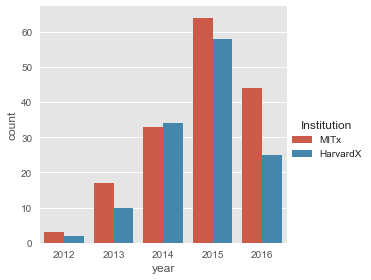

In [8]:
sns.factorplot('year',data=df,hue='Institution',kind='count')

# 3. Number of participants per Institution

  Institution  Participants (Course Content Accessed)
0    HarvardX                                 2101121
1        MITx                                 2348736


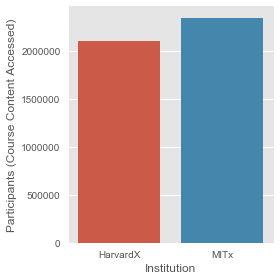

In [60]:
no_of_participents = df[['Institution',"Participants (Course Content Accessed)"]].groupby('Institution').sum()
no_of_participents = no_of_participents.reset_index()

print(no_of_participents)

sns.factorplot(x='Institution',y='Participants (Course Content Accessed)',kind='bar',data=no_of_participents)